In [46]:
import matplotlib.pyplot as plt

# Helper Functions

def calculate_total_seek(order):
  total_seek = 0
  for i in range(1, len(order)):
      total_seek += abs(order[i] - order[i - 1])
  return total_seek

def plot_order(order, title):
  x_values = range(len(order))

  plt.figure()
  plt.plot(x_values, order, marker='o', linestyle='-', label=title)

  for i, txt in enumerate(order):
    plt.annotate(txt, (x_values[i], order[i]), textcoords="offset points", xytext=(0, 5), ha='center')

  plt.title(title)
  plt.xlabel('Request Index')
  plt.ylabel('Disk Position')
  plt.legend()
  plt.show()


# Working Algorithms

def fcfs_scheduling(initial_position, requests):
  order = [initial_position] + requests

  plot_order(order, 'FCFS Order')
  print("Total Seek for FCFS Order:", calculate_total_seek(order))
  
def sstf_scheduling(initial_position, requests):
  order = [initial_position]

  while requests:
    next_request = min(requests, key=lambda x: abs(order[-1] - x))
    order.append(next_request)
    requests = [req for req in requests if req != next_request]
  
  plot_order(order, 'SSTF Order')
  print("Total Seek for SSTF Order:", calculate_total_seek(order))

def scan_scheduling(initial_position, requests):
  requests.sort()

  above = [req for req in requests if req >= initial_position]
  below = [req for req in requests if req < initial_position]

  above.sort()

  scan_order = above + below[::-1]

  order = [initial_position] + scan_order
  plot_order(order, 'SCAN Order')
  print("Total Seek for SCAN Order:", calculate_total_seek(order))

def c_scan_scheduling(initial_position, requests, disk_size):
  # Sort the requests to simplify the C-SCAN algorithm
  requests.sort()

  # Split requests into those above and below the initial position
  above = [req for req in requests if req >= initial_position]
  below = [req for req in requests if req < initial_position]

  # Sort the requests above the initial position in ascending order
  above.sort()

  # Combine the sorted above and below requests
  c_scan_order = above + [disk_size] + [0] + below

  order = [initial_position] + c_scan_order
  plot_order(order, 'C-SCAN Order')
  print("Total Seek for C-SCAN Order:", calculate_total_seek(order))

def look_scheduling(initial_position, requests):
  order_asc = [req for req in requests if req >= initial_position]
  order_desc = [req for req in requests if req < initial_position]

  order_asc.sort()
  order_desc.sort(reverse=True)

  order =  [initial_position] + order_asc + order_desc
  plot_order(order, 'LOOK Order')
  print("Total Seek for LOOK Order:", calculate_total_seek(order))

def c_look_scheduling(initial_position, requests):
  order_above = [req for req in requests if req >= initial_position]
  order_below = [req for req in requests if req < initial_position]

  order_above.sort()
  order_below.sort()

  order =  [initial_position] + order_above + order_below
  plot_order(order, 'C-LOOK Order')
  print("Total Seek for C-LOOK Order:", calculate_total_seek(order))


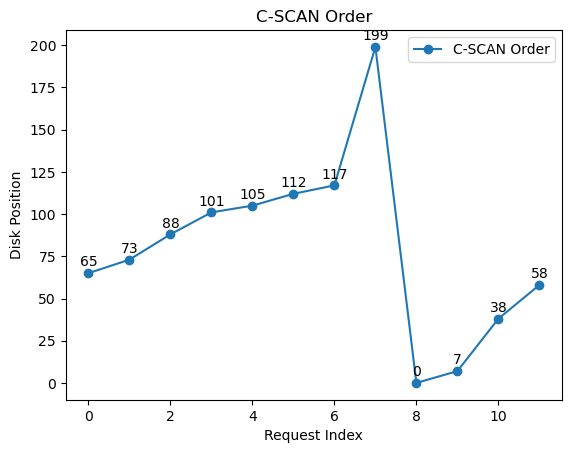

Total Seek for C-SCAN Order: 391


In [47]:
initial_position = 65
requests = [117, 58, 112, 7, 101, 73, 105, 38, 88]

fcfs_scheduling(initial_position, requests)
sstf_scheduling(initial_position, requests)
scan_scheduling(initial_position, requests)
c_scan_scheduling(initial_position, requests, 199)
look_scheduling(initial_position, requests)
c_look_scheduling(initial_position, requests)